In [1]:
import pandas as pd
import pandas as pd  # For data handling
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from textwrap import wrap
import matplotlib.pyplot as plt
from textblob import TextBlob
import numpy as np
import seaborn as sns

In [2]:
sns.set_palette("colorblind", n_colors = 100)

In [3]:
path = '/Users/shafz/OneDrive/Documents/deep-learning-final-project-yelp_reviews_classification/data/raw'
reddit = pd.read_csv(path+'/reddit_raw.csv')
reddit = reddit.drop('Unnamed: 0', axis = 1)
reddit.head(5)

,text,subreddit,bucket,annotator,annotation,confidence
0,That particular part of the debate is especial...,europe,French politics,annotator03,Non-Moral,Confident
1,That particular part of the debate is especial...,europe,French politics,annotator01,Purity,Confident
2,That particular part of the debate is especial...,europe,French politics,annotator02,Thin Morality,Confident
3,"/r/france is pretty lively, with it's own ling...",europe,French politics,annotator03,Non-Moral,Confident
4,"/r/france is pretty lively, with it's own ling...",europe,French politics,annotator00,Non-Moral,Somewhat Confident


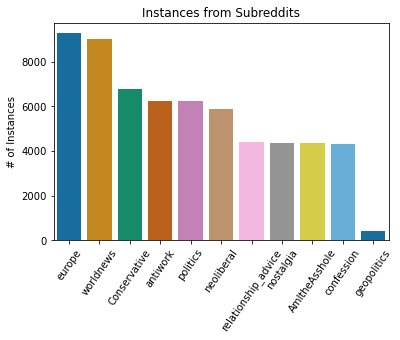

In [4]:
sns.barplot(x=reddit.subreddit.value_counts().index, y=reddit.subreddit.value_counts())
plt.xticks(rotation=55)
plt.title('Instances from Subreddits')
plt.ylabel('# of Instances')
#plt.show()

plt.savefig('subreddits.png', pad_inches=0.1,
        facecolor='white', bbox_inches = "tight")

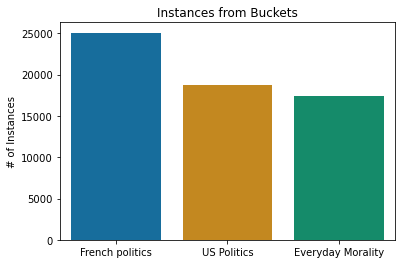

In [42]:
sns.barplot(x=reddit.bucket.value_counts().index, y=reddit.bucket.value_counts())
plt.xticks(rotation=0)
plt.title('Instances from Buckets')
plt.ylabel('# of Instances')
#plt.show()

plt.savefig('bucket.png', pad_inches=0.1,
        facecolor='white', bbox_inches = "tight")

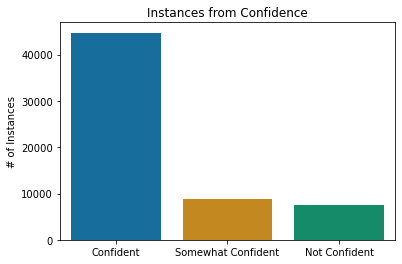

In [36]:
sns.barplot(x=reddit.confidence.value_counts().index, y=reddit.confidence.value_counts())
plt.xticks(rotation=0)
plt.title('Instances from Confidence')
plt.ylabel('# of Instances')
#plt.show()

plt.savefig('confidence.png', pad_inches=0.1,
        facecolor='white', bbox_inches = "tight")

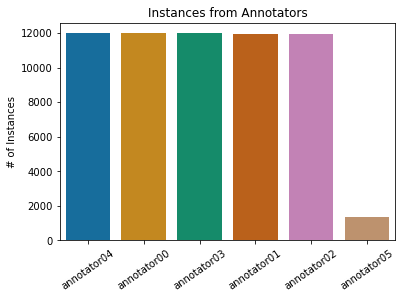

In [40]:
sns.barplot(x=reddit.annotator.value_counts().index, y=reddit.annotator.value_counts())
plt.xticks(rotation=35)
plt.title('Instances from Annotators')
plt.ylabel('# of Instances')
#plt.show()

plt.savefig('annotators.png', pad_inches=0.1,
        facecolor='white', bbox_inches = "tight")

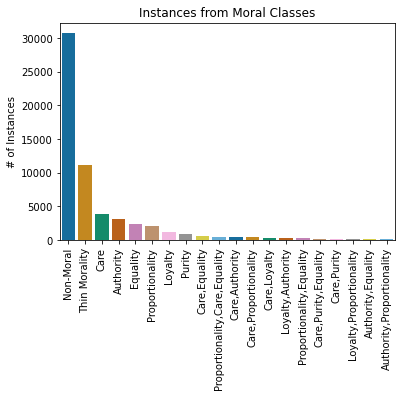

In [34]:
sns.barplot(x=reddit.annotation.value_counts().index[:20], y=reddit.annotation.value_counts()[:20])
plt.xticks(rotation=90)
plt.title('Instances from Moral Classes')
plt.ylabel('# of Instances')
#plt.show()

plt.savefig('annotation_counts2.png', pad_inches=0.1,
        facecolor='white', bbox_inches = "tight")

In [5]:
foundations = ['care','harm','fairness','cheating','loyalty','betrayal','authority','subversion','sanctity','degradation','liberty', 'oppression', 
               'non-moral', 'equality', 'proportionality', 'purity']

In [6]:
reddit_filtered = reddit.loc[reddit['confidence']== 'Confident']

idx = []
annos = {}
for i in range(len(reddit_filtered)):
  foundation = reddit_filtered["annotation"].iloc[i]
  if foundation.lower() in foundations:
    pass 
  else:
    annos[foundation] = 1
    idx.append(i)

idx_ = reddit_filtered.iloc[idx].index.values    
reddit_filtered = reddit_filtered.drop(idx_, axis = 0)
reddit_filtered = reddit_filtered.drop(['annotator', 'confidence'], axis = 1)
reddit_filtered["annotation"].value_counts()

Non-Moral          24186
Care                2560
Authority           1699
Equality            1686
Proportionality     1389
Loyalty              700
Purity               544
Name: annotation, dtype: int64

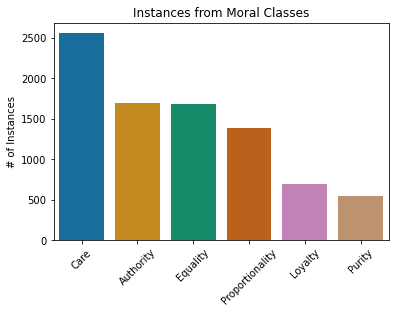

In [7]:
sns.barplot(x=reddit_filtered.annotation.value_counts().index[1:], y=reddit_filtered.annotation.value_counts()[1:])
plt.xticks(rotation=45)
plt.title('Instances from Moral Classes')
plt.ylabel('# of Instances')
# plt.show()

plt.savefig('annotation_counts_filtered2.png', pad_inches=0.1,
        facecolor='white', bbox_inches = "tight")

In [23]:
subreddit_dummies = pd.get_dummies(reddit_filtered['subreddit'])
anno_dummies = pd.get_dummies(reddit_filtered['annotation'])
# corr = subreddit_dummies.corr()
# plt.figure(figsize = (12,10))
# sns.heatmap(corr, annot = True, vmin=-1, vmax=1, linewidths=.5)
# plt.grid(b=True, color='#f68c1f', alpha=0.1)
# plt.show()


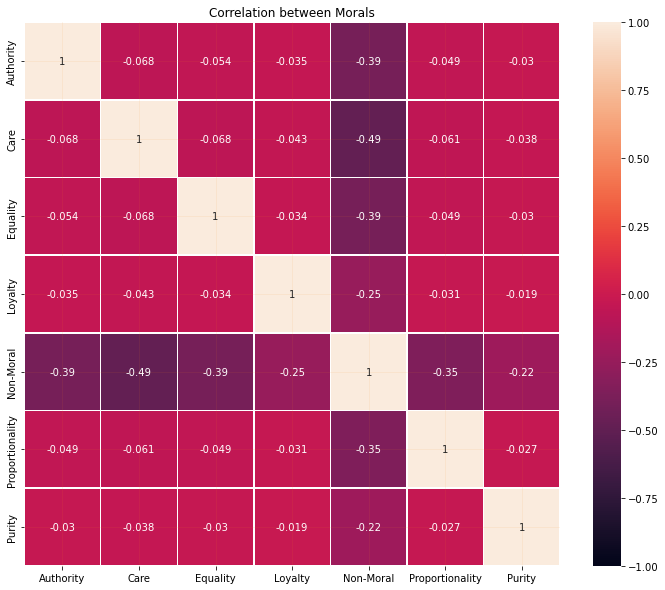

In [8]:
annos_dummies = pd.get_dummies(reddit_filtered['annotation'])

# reddit_copy = pd.concat([reddit_copy, subreddit_dummies], axis = 1)
corr = annos_dummies.corr()
plt.figure(figsize = (12,10))

sns.heatmap(corr, annot = True, vmin=-1, vmax=1, linewidths=.5)
plt.grid(b=True, color='#f68c1f', alpha=0.1)
plt.title('Correlation between Morals')
# plt.show()

plt.savefig('annotation_corr.png', pad_inches=0.1,
        facecolor='white', bbox_inches = "tight")

For our EDA, we are going to focus on 

* Understanding the distribution of reviews (e.g. how many positive vs. negative reviews we have)
* Understand why reviews are classified as positive or negative
* Try to see if businesses can be grouped into businesses with largely positive reviews/largely negative reviews 

### EDA on text data

In [44]:
path = '/Users/shafz/OneDrive/Documents/deep-learning-final-project-yelp_reviews_classification/data/processed/'
reddit_text = pd.read_csv(path + 'lemmatized_reddit.csv')

In [45]:
reddit_text.head()

,Unnamed: 0,text,subreddit,bucket,annotation,lemmatized
0,0,"/r/france is pretty lively, with it's own ling...",europe,French politics,Non-Moral,france pretty lively lingo usually deliberatel...
1,1,The Le Pen brand of conservatism and classical...,europe,French politics,Non-Moral,le pen brand conservatism classical right wing...
2,2,"Clinton lead polls by 4%, well within a reason...",worldnews,French politics,Non-Moral,clinton lead poll reasonable margin lose le pe...
3,3,"Hey, fuck you. Us leftists will never support ...",worldnews,French politics,Equality,hey fuck leftist support le pen especially con...
4,4,You are simplifying it. Islam is not the sole ...,europe,French politics,Care,simplify islam not sole reason terrorism weste...


In [47]:
# Aggregates all of the reviews for a single business
df_grouped=reddit_text[['subreddit','lemmatized']].astype(str).groupby(by='subreddit')['lemmatized'].apply(' '.join).reset_index()
df_grouped.head()

,subreddit,lemmatized
0,AmItheAsshole,ll convince people like vulnerable scam not cr...
1,Conservative,solution le pen win doubtful event germany pro...
2,antiwork,bruhwhat abaut pointless expansionblood money ...
3,confession,bro transcend gender humanity cat bro agree ge...
4,europe,france pretty lively lingo usually deliberatel...


In [75]:
## Creating a document term matrix which counts the frequency of each word in all the reviews for a given business 
cv = CountVectorizer(analyzer='word', min_df=10)
data = cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names_out())
df_dtm = df_dtm.drop(['not', 'like', 'thing', 'people', 'think', 'want', 'tell', 'want', 'need', 'know', 'go'], axis=1)

## Sets the index of the document term matrix as the business id 
df_dtm.index=df_grouped['subreddit']


df_dtm.head(10)


,able,absolutely,abuse,action,actually,address,admit,ago,agree,always,...,wonder,word,work,world,worth,write,wrong,yeah,year,yes
subreddit,,,,,,,,,,,,,,,,,,,,,
AmItheAsshole,17,17,27,14,15,3,4,3,19,17,...,4,15,30,1,3,3,20,5,34,20
Conservative,14,25,9,20,38,1,9,7,22,24,...,6,20,23,17,5,6,27,20,42,20
antiwork,16,10,14,9,20,3,4,2,10,46,...,8,14,272,27,11,5,10,25,24,22
confession,8,2,12,14,13,1,5,6,13,11,...,5,9,40,24,4,1,33,8,26,7
europe,15,20,4,9,57,11,6,6,55,21,...,7,14,48,42,5,10,23,30,52,27
geopolitics,0,3,0,0,0,1,2,0,1,2,...,1,0,1,0,1,0,0,1,1,2
neoliberal,8,9,4,4,31,2,1,6,14,7,...,3,8,28,35,4,2,9,19,35,16
nostalgia,2,5,1,1,4,0,0,3,0,9,...,4,6,10,5,2,5,5,5,18,8
politics,11,17,4,17,33,2,4,2,19,29,...,12,12,34,14,11,6,12,17,34,21


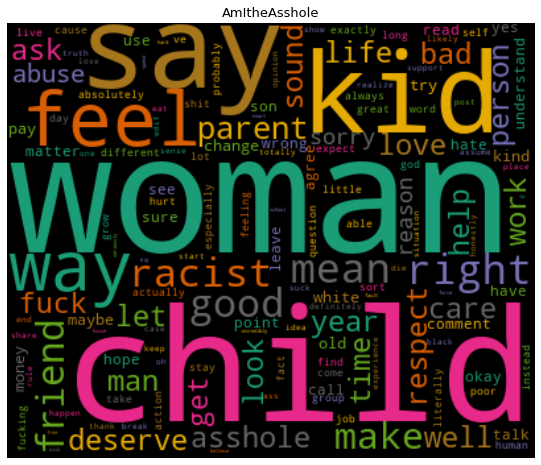

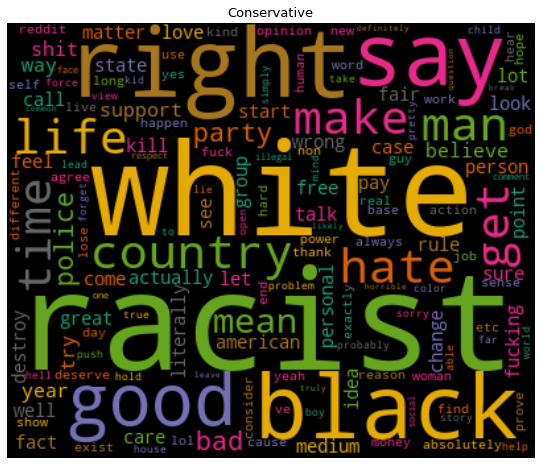

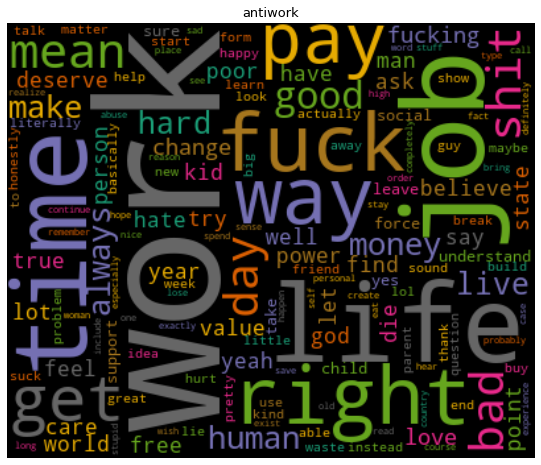

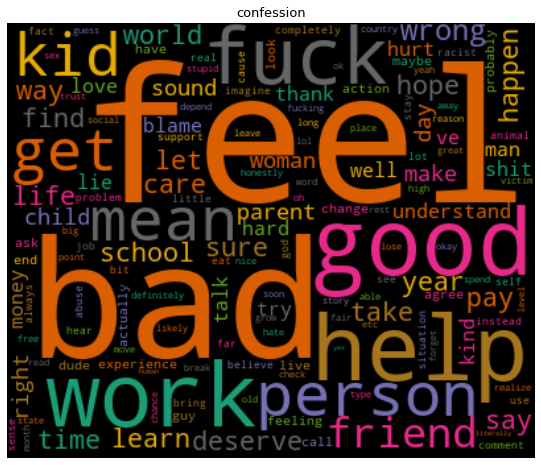

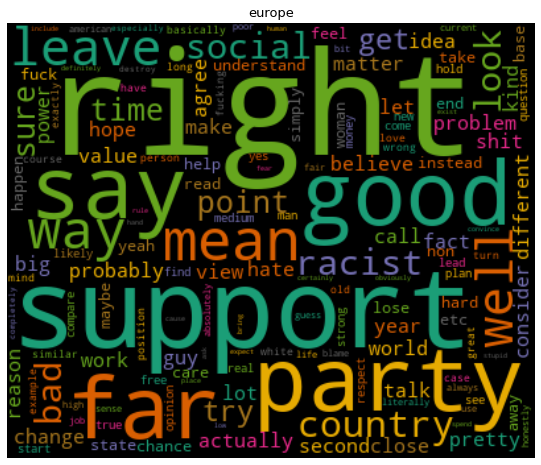

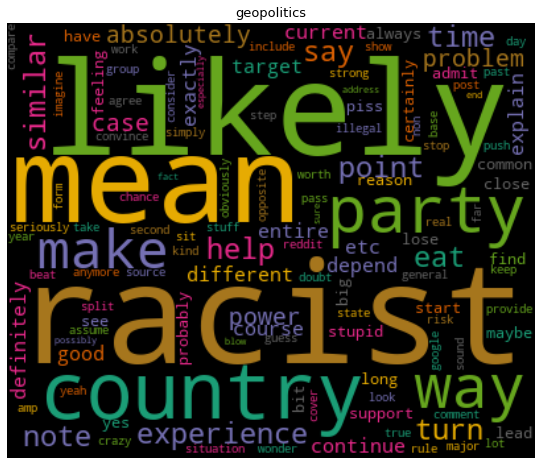

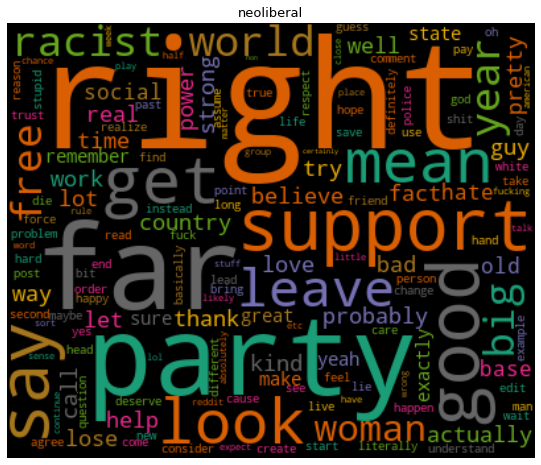

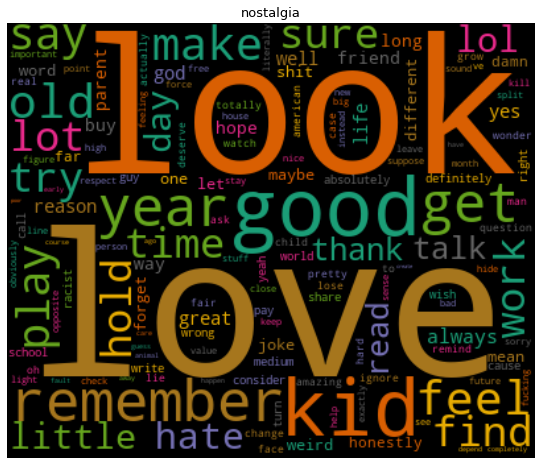

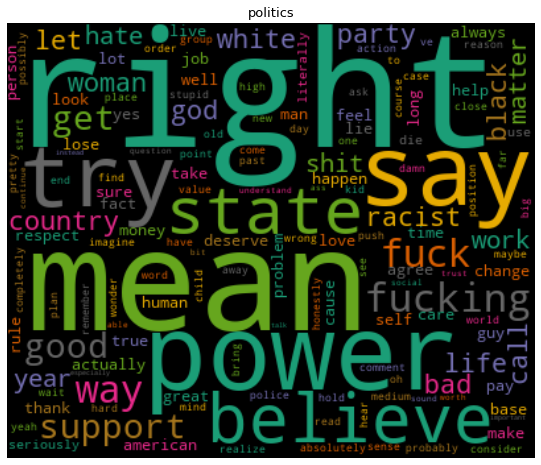

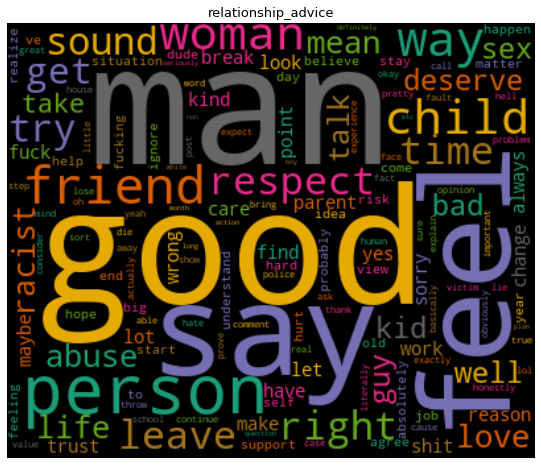

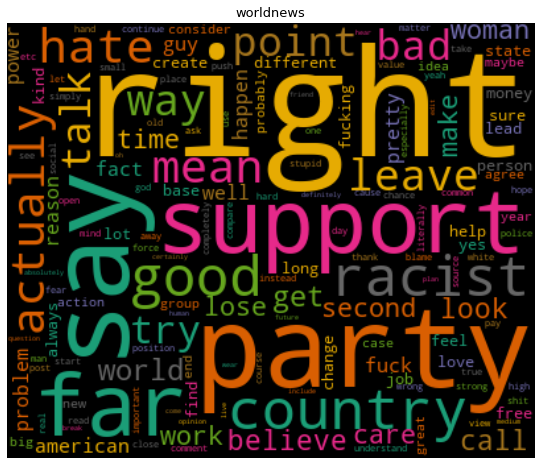

In [76]:
# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

  return wc 
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  cloud = generate_wordcloud(df_dtm[product].sort_values(ascending=False),product) 
  cloud.to_file('{}.png'.format(product))  

## Using TextBlob for basic sentiment analysis of reviews

In [77]:
reddit_text['polarity']=reddit_text['lemmatized'].astype(str).apply(lambda x:TextBlob(x).sentiment.polarity)

In [78]:
print("5 Random Reviews with Highest Polarity:")
for index,review in enumerate(reddit_text.iloc[reddit_text['polarity'].sort_values(ascending=False)[:5].index]['text']):
  print('Review {}:\n'.format(index+1),review)

5 Random Reviews with Highest Polarity:
Review 1:
 the overlap here between *Nationaldemokratische Partei Deutschlands* NPD and Narcissistic Personality Disorder NPD is perfect.
Review 2:
 A lot a misogynist men are salty about this, so Macron is doing awesome.
Review 3:
 This guy really is just incredible with his lack of self awareness. But I guess that comes with being a flaming liberal...
Review 4:
 A lukewarm campaign to elect the severed prehensile tail of Macron: $50,000,0000

The L: Priceless.
Review 5:
 Thats fucking brilliant. Thank you for delivering this into my life.


In [79]:
print("5 Random Reviews with Lowest Polarity:")
for index,review in enumerate(reddit_text.iloc[reddit_text['polarity'].sort_values(ascending=False)[-5:].index]['text']):
  print('Review {}:\n'.format(index+1),review)

5 Random Reviews with Lowest Polarity:
Review 1:
 Why is he a hero? I think Le Pen would be a terrible choice, but that doesn't make this guy the messiah. 
Review 2:
 Please do not punish your fiancé for what this asshole did. I can promise this is extremely horrible for her, too. I can’t imagine how violated she feels.
Review 3:
 NTA. Protecting you sister isn't holding a grudge. You family is really awful.
Review 4:
 Boring government is how we got geometric zoning and occupational licensing laws. We need to shake things up, like Macron did.
Review 5:
 Any other president/presidential candidate pushing these insane demands and tweeting about conspiracies would be spending time in either a prison cell or a psychiatric hospital.


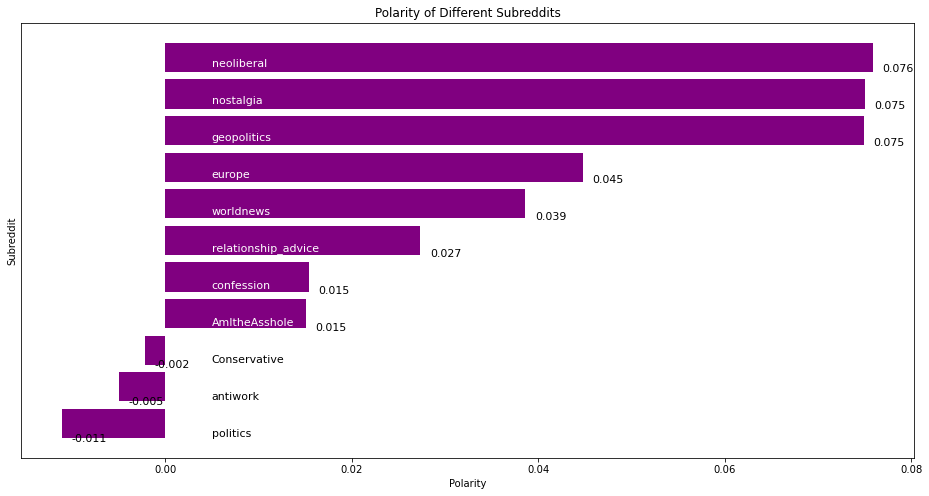

In [94]:
product_polarity_sorted=pd.DataFrame(reddit_text.groupby('subreddit')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Subreddit')
plt.title('Polarity of Different Subreddits')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['polarity'],color='purple',)

# Writing product names on bar
for bar,product in zip(polarity_graph[3:],product_polarity_sorted.index[3:]):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='bottom',fontsize=11,color='white')

for bar,product in zip(polarity_graph[:3],product_polarity_sorted.index[:3]):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='bottom',fontsize=11,color='black')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,product_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
#plt.show()


plt.savefig('polarity.png', pad_inches=0.1,
        facecolor='white', bbox_inches = "tight")

In [92]:
product_polarity_sorted

,polarity
subreddit,
politics,-0.011075
antiwork,-0.004907
Conservative,-0.002134
AmItheAsshole,0.015084
confession,0.015437
relationship_advice,0.027387
worldnews,0.038641
europe,0.044844
geopolitics,0.074962
